In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
url =  'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'
data = pd.read_csv(url)

In [3]:
data.head() # Have a look on our data.

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### Our Aim is to determine Wine Quality. So our output variable is Quality.and it looks like our target variable is class type.

In [4]:
### Let's check our data size.
data.shape

(1599, 12)

#### So we have 1599 rows and 12 columns.

## EDA

In [5]:
# Checking for null values.
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### There is no null values found in our data.

In [6]:
# get some more information about our datasets.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Great to all the independant variables data type is float and our target variable is integer type.

In [7]:
# High level statistics:
data.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Obervations
##### Count for all the columnes are same.
##### The difference between Mean and Std for all the columns look fine.
##### Quartiles difference are fine for all the columns except Total sulfur dioxide we can see there is huge difference between 3 Quartile and Max value, We will have a look on it.

#### i) Univariate Analysis

In [8]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

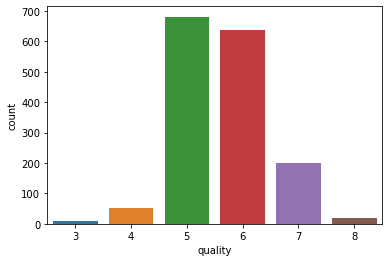

In [9]:
sns.countplot(x='quality',data=data)

In [10]:
# Lets convert our data target variable to good and bad quality only.
data['quality'] = data['quality'].apply(lambda x: 0 if x<7 else 1)

##### Here 0 means bad quality and 1 means Good quality of wine.

Bad quality =  0    1382
1     217
Name: quality, dtype: int64
Good quality =  0    0.86429
1    0.13571
Name: quality, dtype: float64


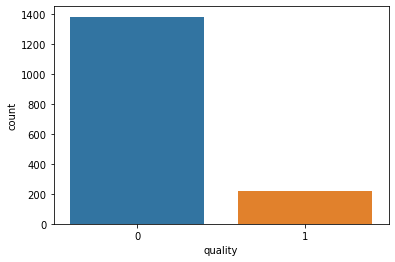

In [11]:
sns.countplot(x = 'quality',data=data,)
print('Bad quality = ',data['quality'].value_counts(0))
print('Good quality = ',data['quality'].value_counts(1))

##### WE can see there is class imbalancing problem in our target variable. we will look into it.

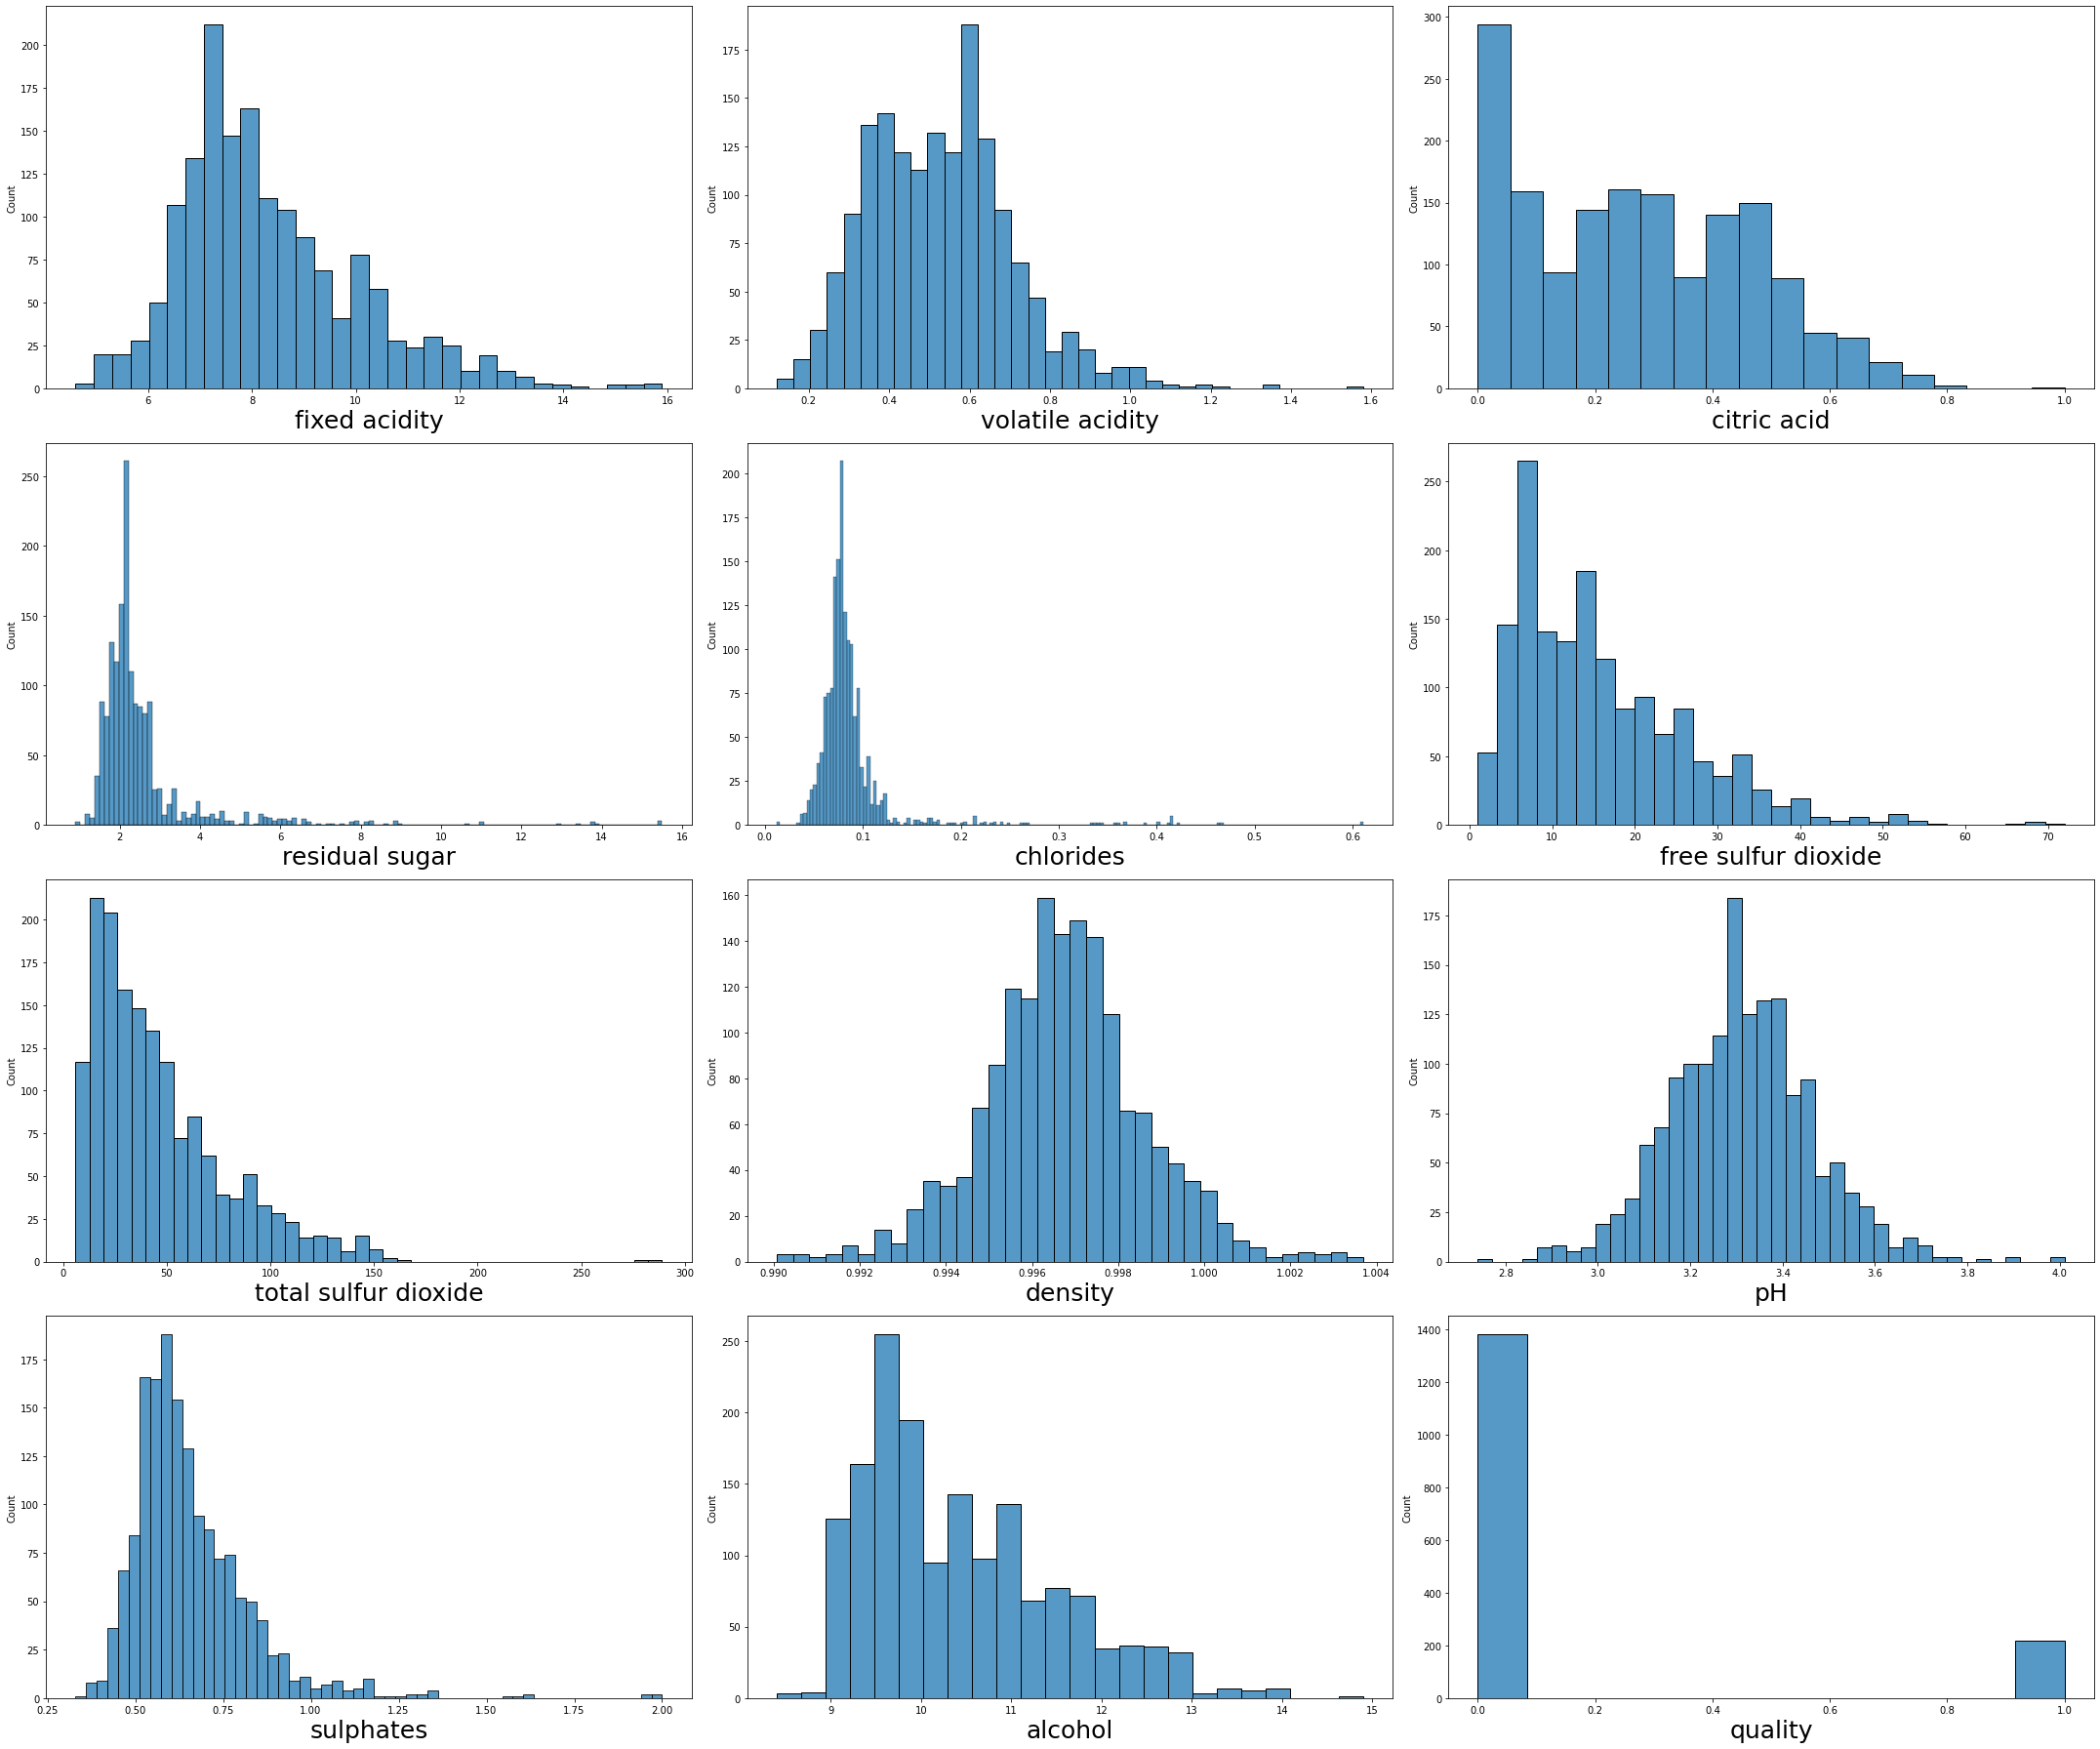

In [12]:
# Checking data distirution for all the features
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

##### As we can see:- 
######  In fixed acid data is right skewed.
###### Volatile acidity also show some right skewness.
###### Citric acid data is right skewed.
###### In Residual sugar, Chlorides, Free sulfur dixoide, Total sulfur dioxide and sulphates columns data is highly right skewed.


In [13]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

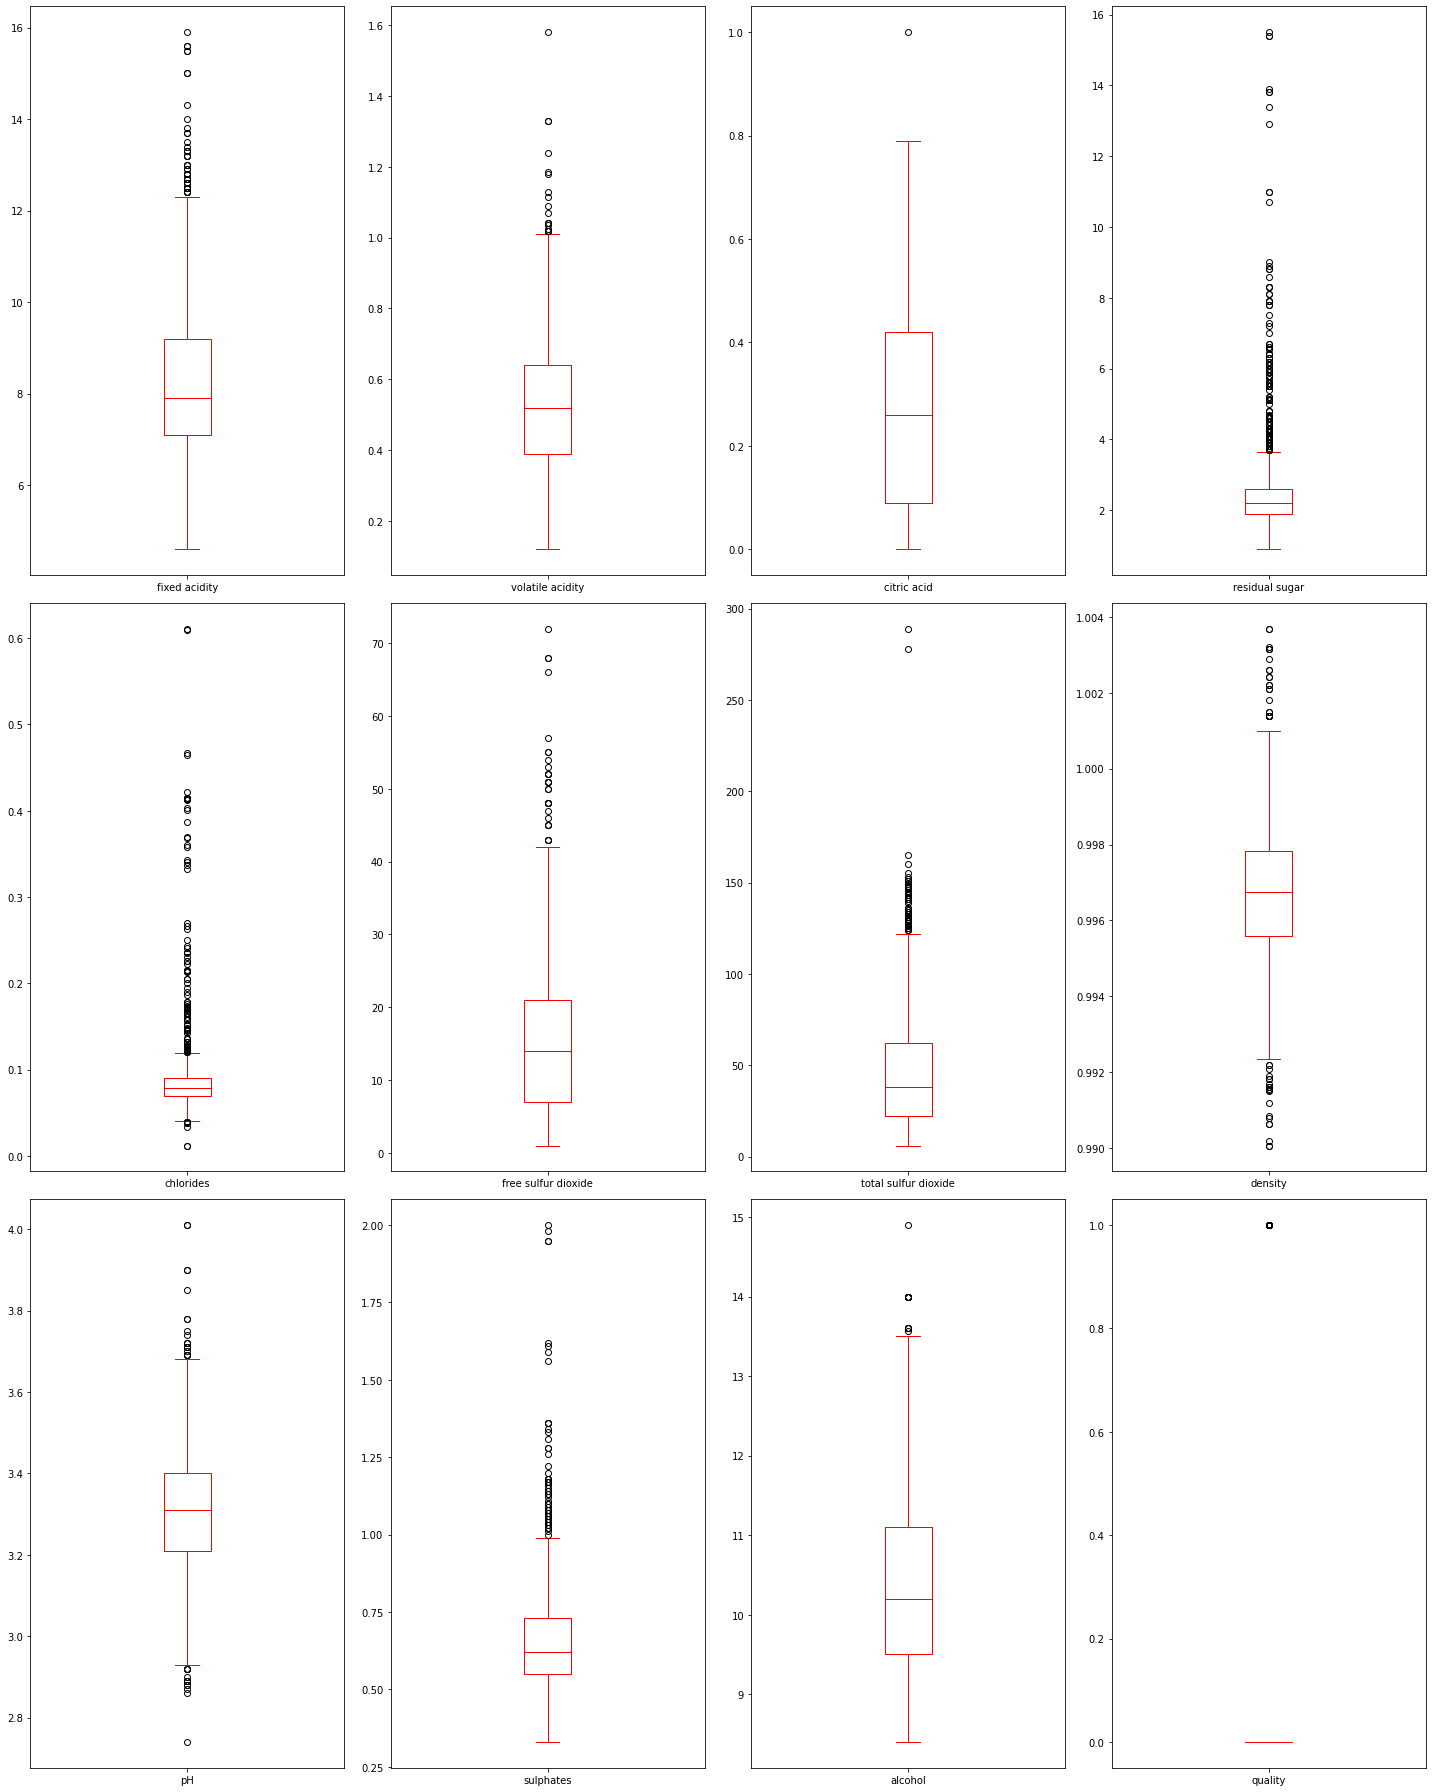

In [14]:
plt.figure(figsize= (20,25))
count =1
for column in data:
    if count <=12:
        ax = plt.subplot(3,4,count)
        data[column].plot(kind = 'box',color ='r')
    count +=1
plt.tight_layout()

##### From the above boxplot we can clearly see that our maximum columns have outlier in it.
##### So we have one more task we have to remove the outliers.

####  ii) Bivariate Analysis

######  In this we will check relationship between features and  target, also check relationship between features and features.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

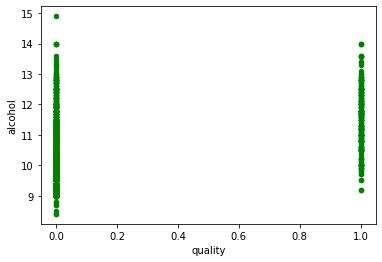

In [15]:
data.plot(kind ='scatter',x='quality',y='alcohol',color ='g')

###### From the above graph we can say that as the alcohol amount increases wine quality also increases.

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

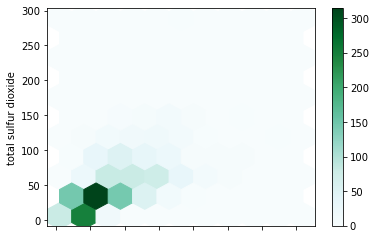

In [16]:
data.plot.hexbin(x = 'free sulfur dioxide',y = 'total sulfur dioxide', gridsize =10 )

###### We most of the relationship at starting level.

<function matplotlib.pyplot.show(close=None, block=None)>

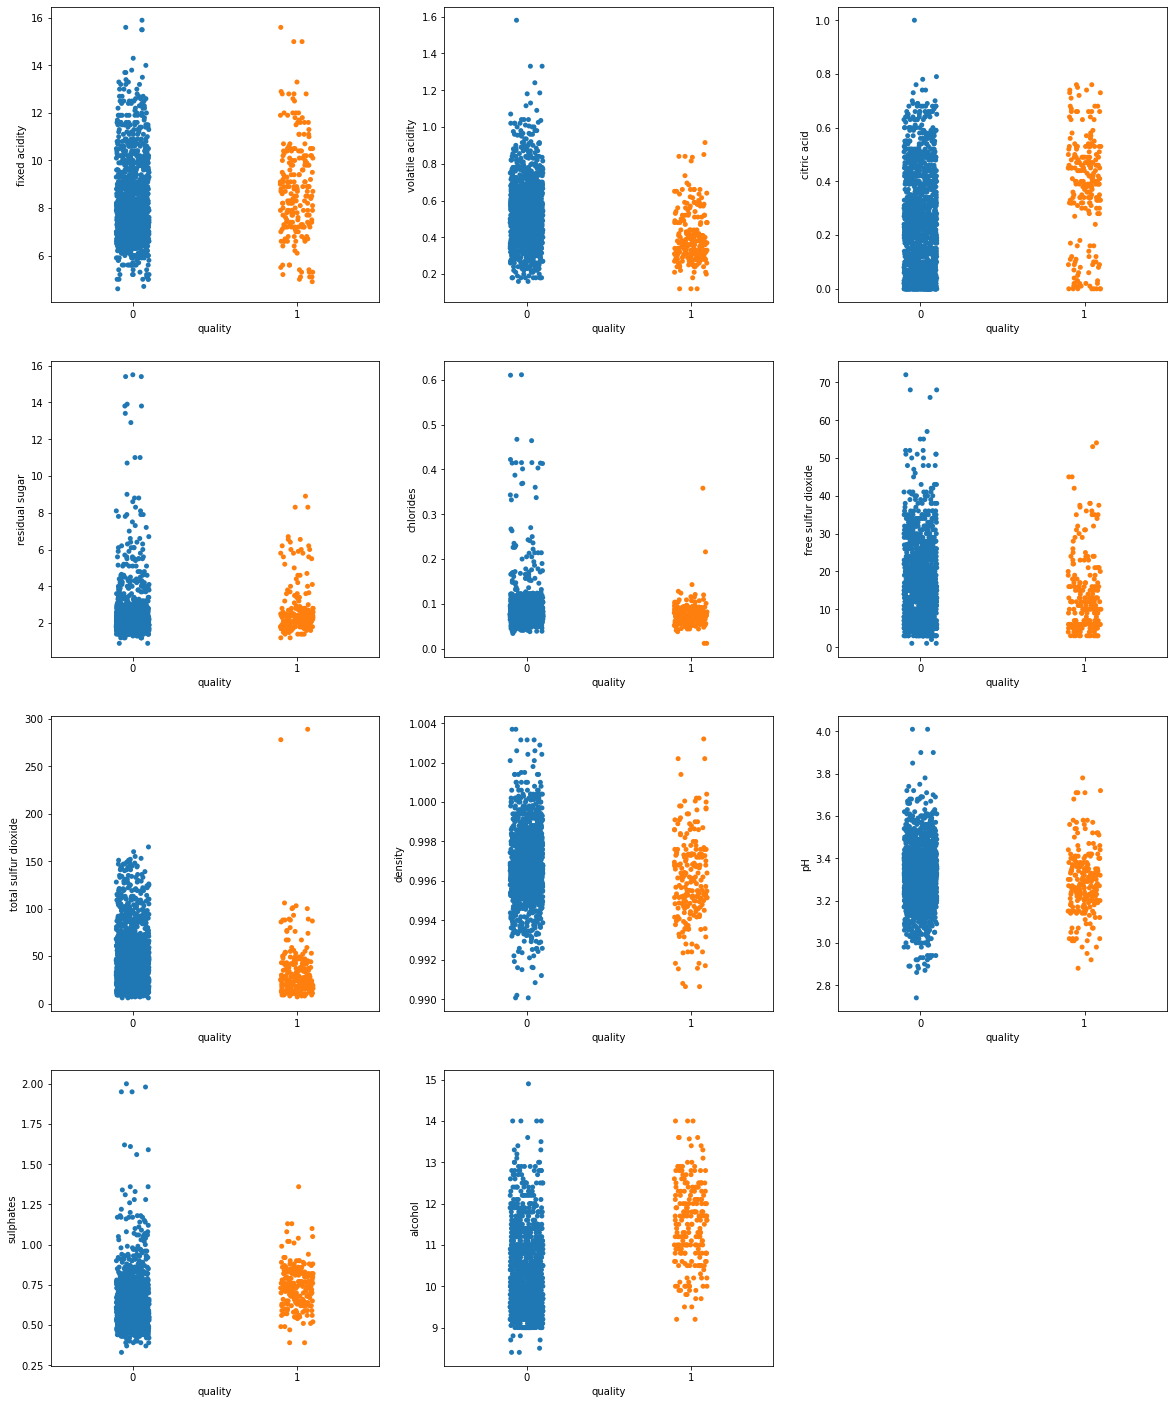

In [17]:
# Now see relationship of all the variables with target variable.
plt.figure(figsize=(20,25),facecolor='White')
plotnumber = 1
for column in data:
    if plotnumber<=11:
        ax = plt.subplot(4,3,plotnumber)
        sns.stripplot(data['quality'],data[column])
    plotnumber+=1
plt.show

#### Obersvation
##### We can see as Sulphates and cholrides amount increasres our win quality decreases.
##### Fixed acidity and citric acid increases the wine quality.

<AxesSubplot:xlabel='density', ylabel='fixed acidity'>

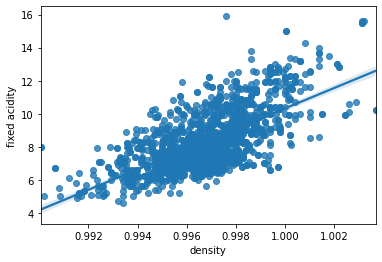

In [18]:
sns.regplot(x =data['density'],y=data['fixed acidity'])

###### Density and fixed acidity shows strong relationship

<AxesSubplot:>

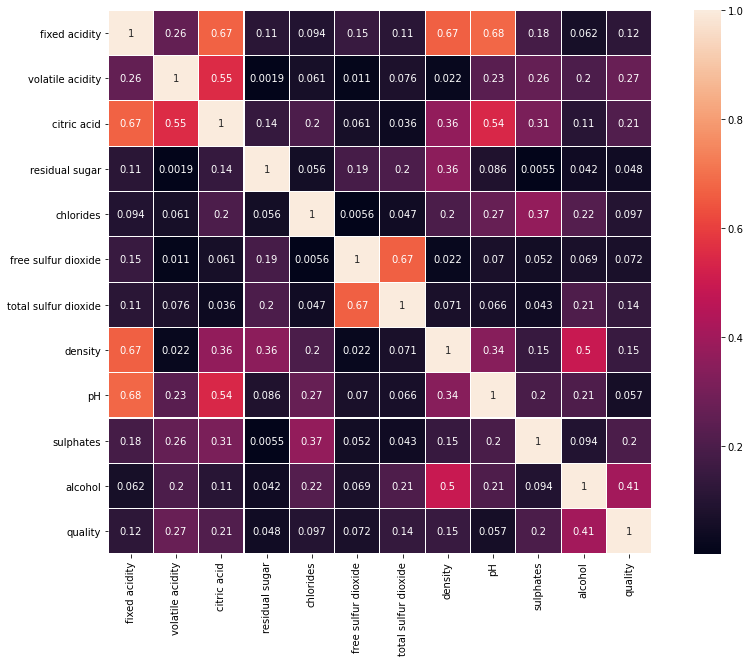

In [19]:
### Le`t's check Correlation between all the variables.
data_corr = data.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(data_corr,linewidths=0.1,square=True,annot=True)

###### From the heatmap we can see that  alcohol is 41% related to wine quality.
###### Also density, PH and citric acid have 67%,68% and 67% relationship with Fixed acidity respectively.
###### Total sulfur dioxide and free sulfur dioxide shows 67% relationship.

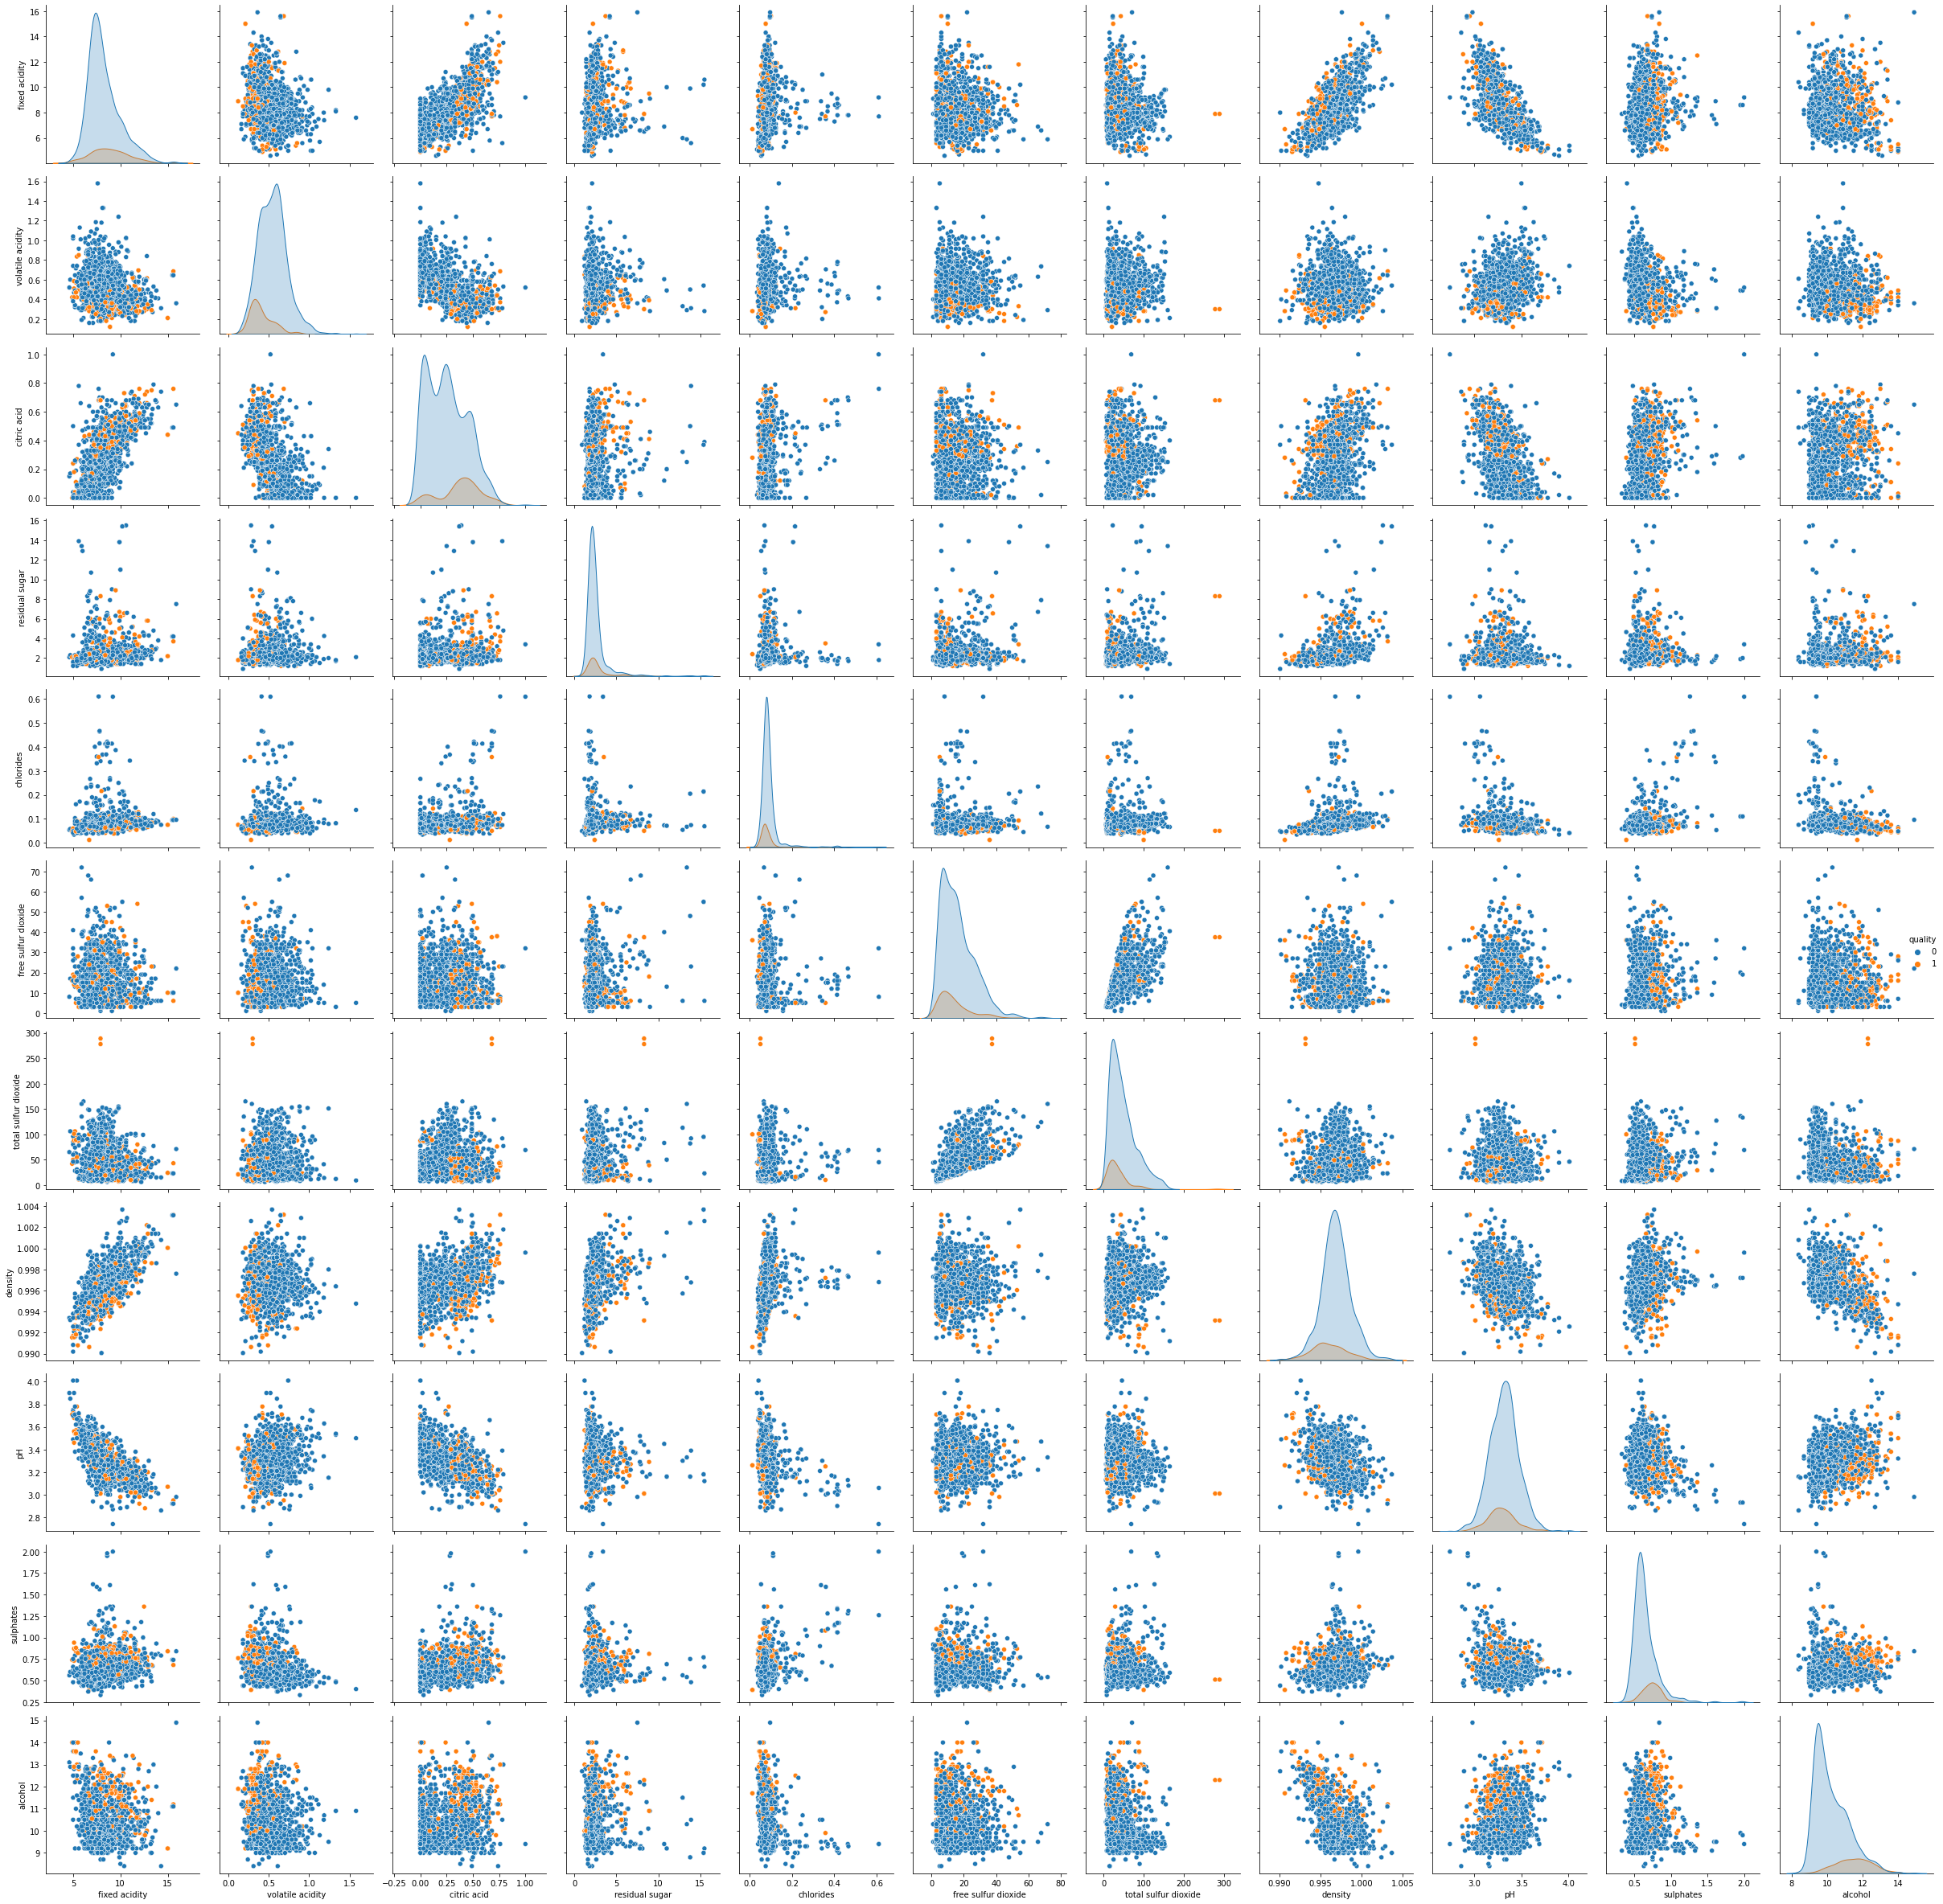

In [20]:
sns.pairplot(data,hue='quality',size =3)
plt.tight_layout()

###### From this pair plot we can see there is strong relationship between density and Fixed_acidity.
###### also we can see if alcohol increases fixed acidity is also increases.

### Let's do Pre-processing

##### Let's first take care of outliers

In [21]:
from scipy.stats import zscore
z = np.abs(zscore(data))
df = data[(z<3).all(axis =1)]

In [22]:
df.shape

(1458, 12)

In [23]:
data.shape

(1599, 12)

In [24]:
data_loss = ((1599 - 1458)/1599)*100
print('After applying Zscore our data loss is = ',data_loss,' that is 8.8 percentage.')

After applying Zscore our data loss is =  8.818011257035648  that is 8.8 percentage.


##### We can see in most of our columns we have skewness. lets remove our target variable first.

## Seperating Independant variables and Target variable

In [25]:
# Spliting data set into x and y.
x = df.drop(['quality'],axis=1)
y = df['quality']

In [26]:
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

## Removing Skewness

In [27]:
 # let's remove the skewness 
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new  = pd.DataFrame(df_new,columns=x.columns)
df_new.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.469102          1.045775    -1.521870       -0.610050  -0.145674   
1      -0.172127          1.902404    -1.521870        0.648011   0.981105   
2      -0.172127          1.344815    -1.242790        0.207208   0.714585   
3       1.571351         -1.559116     1.441794       -0.610050  -0.207728   
4      -0.469102          1.045775    -1.521870       -0.610050  -0.145674   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.238196             -0.063312  0.635233  1.359954  -0.588230   
1             1.092232              0.954919  0.056291 -0.818421   0.453527   
2             0.241177              0.626959  0.172545 -0.382868   0.221989   
3             0.442705              0.786687  0.750325 -1.112726  -0.391548   
4            -0.238196             -0.063312  0.635233  1.359954  -0.588230   

    alcohol  
0 -1.112329  
1 -0.526854  
2 -0.526854  
3 -0.526854  
4 -1.112329

In [28]:
df_new.skew()

fixed acidity           0.019079
volatile acidity        0.005289
citric acid             0.018652
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                -0.000989
pH                     -0.000062
sulphates               0.021132
alcohol                 0.108436
dtype: float64

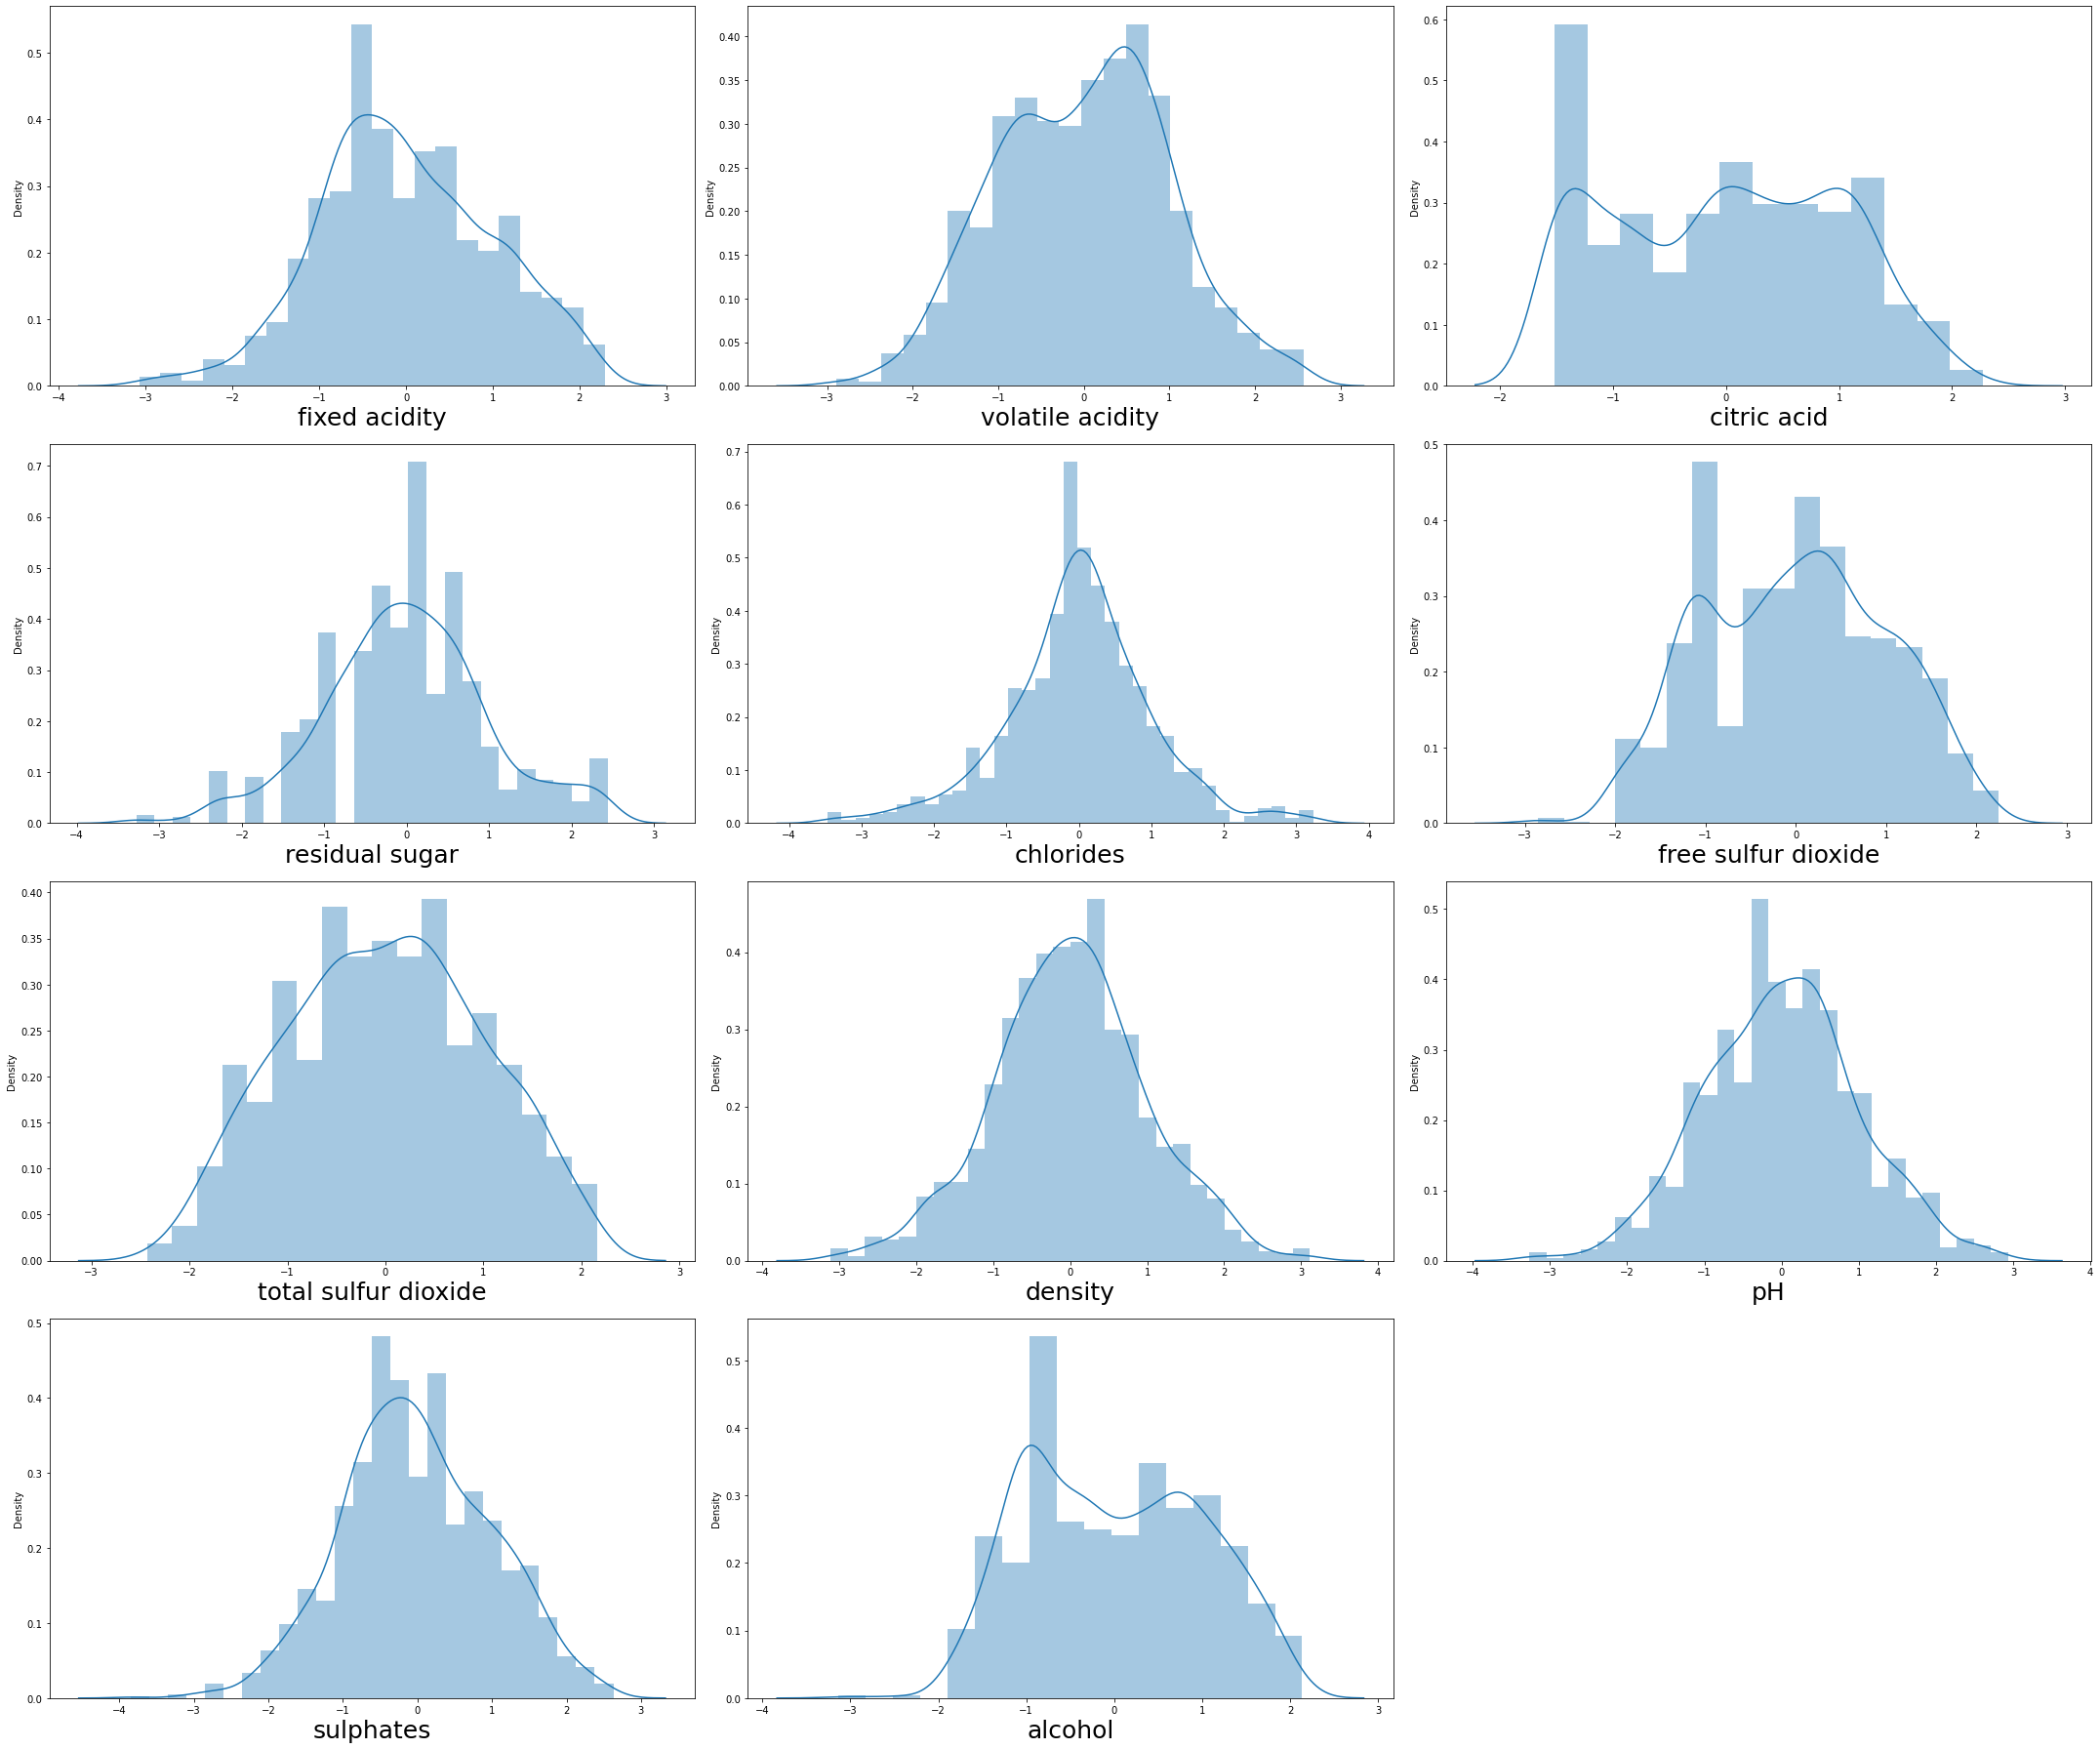

In [29]:
# Let's check distribution again.
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in df_new:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

###### As we can see from above values skewness is removed from all the columns. Now data distribution looks like normally distributed.

In [30]:
x = df_new ## Lets store this Dataframe back to x.

## Class Imbalancing 

In [31]:
# Now let's deal with Class imbalance problem.
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_new,y_new = sm.fit_resample(x,y)

In [32]:
y_new.shape

(2514,)

In [33]:
x_new.shape

(2514, 11)

##### Class imbalance problem is removed.

## Scaling (Standardization)

In [34]:
#### Now lets scale our data.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_new = scale.fit_transform(x_new)


In [35]:
x_new.shape

(2514, 11)

###### Scaled our X data so that our model will not Bais to any of the variable.

## Train - Test Split

In [36]:
 # Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.25,random_state=43)

In [37]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1885, 11) (1885,) (629, 11) (629,)


## Finding best model

In [38]:
## Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [39]:
#### Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred = lr.predict(x_test)

In [41]:
confusion_matrix(y_test,y_pred)

array([[252,  52],
       [ 45, 280]], dtype=int64)

In [42]:
accuracy_lr = classification_report(y_test,y_pred)
print(accuracy_lr)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       304
           1       0.84      0.86      0.85       325

    accuracy                           0.85       629
   macro avg       0.85      0.85      0.85       629
weighted avg       0.85      0.85      0.85       629



In [43]:
cv_lr = cross_val_score(lr,x_new,y_new,cv=5).mean()

In [44]:
#### Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_dt_pred = dt.predict(x_test)

In [46]:
confusion_matrix(y_test,y_dt_pred)

array([[275,  29],
       [ 23, 302]], dtype=int64)

In [47]:
accuracy_dt = classification_report(y_test,y_dt_pred)
print(accuracy_dt)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       304
           1       0.91      0.93      0.92       325

    accuracy                           0.92       629
   macro avg       0.92      0.92      0.92       629
weighted avg       0.92      0.92      0.92       629



In [48]:
cv_dt = cross_val_score(dt,x_new,y_new,cv=5).mean()

In [49]:
### SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [50]:
y_svc_pred = svc.predict(x_test)

In [51]:
confusion_matrix(y_test,y_svc_pred)

array([[266,  38],
       [ 21, 304]], dtype=int64)

In [52]:
accuracy_svc = classification_report(y_test,y_svc_pred)
print(accuracy_svc)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       304
           1       0.89      0.94      0.91       325

    accuracy                           0.91       629
   macro avg       0.91      0.91      0.91       629
weighted avg       0.91      0.91      0.91       629



In [53]:
cv_svc = cross_val_score(svc,x_new,y_new,cv=5).mean()

In [173]:
### Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [174]:
y_rf_pred = rf.predict(x_test)

In [175]:
confusion_matrix(y_test,y_rf_pred)

array([[288,  16],
       [ 11, 314]], dtype=int64)

In [176]:
accuracy_rf = classification_report(y_test,y_rf_pred)
print(accuracy_rf)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       304
           1       0.95      0.97      0.96       325

    accuracy                           0.96       629
   macro avg       0.96      0.96      0.96       629
weighted avg       0.96      0.96      0.96       629



In [156]:
cv_rf = cross_val_score(rf,x_new,y_new,cv=5).mean()

In [59]:
### K-Neighbors Classifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [60]:
y_knn_pred = kn.predict(x_test)

In [61]:
confusion_matrix(y_test,y_knn_pred)

array([[247,  57],
       [  2, 323]], dtype=int64)

In [107]:
accuracy_kn = classification_report(y_test,y_knn_pred)
print(accuracy_kn)

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       304
           1       0.85      0.99      0.92       325

    accuracy                           0.91       629
   macro avg       0.92      0.90      0.90       629
weighted avg       0.92      0.91      0.91       629



In [63]:
cv_kn = cross_val_score(kn,x_new,y_new,cv=5).mean()

In [157]:
print('LogisticRegression acc = ',accuracy_lr,'\n CV score = ',cv_lr,'\n')
print('DecisionTreeClassifier acc = ',accuracy_dt,'\n CV score = ',cv_dt,'\n')
print('SVC  acc = ',accuracy_svc,'\n CV score = ',cv_svc,'\n')
print('RandomForestClassifier acc = ',accuracy_rf,'\n CV score = ',cv_rf,'\n')
print('KNeighborsClassifier acc = ',accuracy_kn,'\n CV score = ',cv_kn,'\n')

LogisticRegression acc =                precision    recall  f1-score   support

           0       0.85      0.83      0.84       304
           1       0.84      0.86      0.85       325

    accuracy                           0.85       629
   macro avg       0.85      0.85      0.85       629
weighted avg       0.85      0.85      0.85       629
 
 CV score =  0.8042953434769867 

DecisionTreeClassifier acc =                precision    recall  f1-score   support

           0       0.92      0.90      0.91       304
           1       0.91      0.93      0.92       325

    accuracy                           0.92       629
   macro avg       0.92      0.92      0.92       629
weighted avg       0.92      0.92      0.92       629
 
 CV score =  0.8623620824851687 

SVC  acc =                precision    recall  f1-score   support

           0       0.93      0.88      0.90       304
           1       0.89      0.94      0.91       325

    accuracy                           0.91 

#### Out of 5 model Random Forest Classifier is our best model, Becuase its given as acc 96% and Cross validatiion score 91.92%. therefore its our best model.

## Let's find ROC_AUC_Scrore`

In [170]:
#### Logistic Regression
roc_auc_score(y_test,y_pred)

0.8452429149797571

In [171]:
#### Decision Tree Classifier
roc_auc_score(y_test,y_dt_pred)

0.916918016194332

In [172]:
#### SVC  
roc_auc_score(y_test,y_svc_pred)

0.9051923076923076

In [177]:
#### Random Forest Classifier 
roc_auc_score(y_test,y_rf_pred)

0.9567611336032389

In [178]:
### K-Neighbors Classifier
roc_auc_score(y_test,y_knn_pred)

0.9031730769230768

### Let's PLOT roc_auc curve for our model

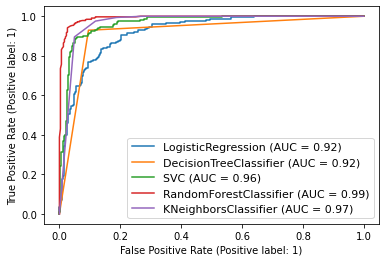

In [179]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_) # Here ax_ means axes with confusion matrix
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11},loc = 'lower right')
plt.show()

##### With roc_auc_curve we can see that Random forest Classifier is covering 99% of test dataset. So for this dataset Random forest Classifier is best model.

## Hyper parameter tuning using GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV

In [103]:
params = {'n_estimators':np.arange(100,200,10),
          'criterion':['gini','entropy'],
          'max_depth':[11],
          'min_samples_split':np.arange(2,11,2),
          'max_features':['auto','sqrt','log2']}

In [104]:
print(params)

{'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190]), 'criterion': ['gini', 'entropy'], 'max_depth': [11], 'min_samples_split': array([ 2,  4,  6,  8, 10]), 'max_features': ['auto', 'sqrt', 'log2']}


In [105]:
gridsearch = GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=-1)

In [106]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 2,  4,  6,  8, 10]),
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])})

In [108]:
gridsearch.best_params_ ## This are the best parameter we have to use for this model

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 170}

In [180]:
### Instantiating Random Forest Classifier again using best parameters.
rfc = RandomForestClassifier(n_estimators=170,criterion='entropy',max_depth=11,max_features='log2',min_samples_split=4,random_state=36)

In [181]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=4, n_estimators=170, random_state=36)

In [182]:
y_rfc_pred = rfc.predict(x_test)

In [183]:
confusion_matrix(y_test,y_rfc_pred)

array([[285,  19],
       [  8, 317]], dtype=int64)

In [186]:
acc = classification_report(y_test,y_rfc_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       304
           1       0.94      0.98      0.96       325

    accuracy                           0.96       629
   macro avg       0.96      0.96      0.96       629
weighted avg       0.96      0.96      0.96       629



In [187]:
cross_val_score(rfc,x_new,y_new,cv=5).mean()

0.9120931779838894

#### So after parameter tuning on Random forest classifier our accuracy is 96% and our cross validation score is 91.2%.
#### We didn't see any change in accuracy and crossvalidation score.

## Saving our model

In [188]:
import pickle
Wine_quality = 'Wine_test.pickle'
pickle.dump(rfc,open(Wine_quality,'wb'))

In [190]:
loaded_model = pickle.load(open(Wine_quality,'rb'))

In [191]:
test = loaded_model.predict(x_test)

In [193]:
confusion_matrix(y_test,test)

array([[285,  19],
       [  8, 317]], dtype=int64)

#### Model tested._______________________________________________________________________________________________